## Objective

Explore the data

In [33]:
import sys

import matplotlib.pyplot as plt
import numpy as np # weird issue with numpy as they are changing supported data types (10.2.24)
# consider !pip install "numpy<1.24"
import pandas as pd
import seaborn as sns

print(np.__version__, pd.__version__)
sys.version

plt.rcParams["figure.figsize"] = (10, 8)

1.23.5 2.2.3


## Data

In [34]:
!tree ..//..//data/raw/stock_reddit_data/

..//..//data/raw/stock_reddit_data/
├── Combined_News_DJIA.csv
├── RedditNews.csv
└── upload_DJIA_table.csv

1 directory, 3 files


In [35]:
df_combined = pd.read_csv("..//..//data/raw/stock_reddit_data/Combined_News_DJIA.csv")

print(df_combined.shape)
df_combined.head(2).T


(1989, 27)


,0,1
Date,2008-08-08,2008-08-11
Label,0,1
Top1,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war""","b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'"
Top2,b'BREAKING: Musharraf to be impeached.',b'Bush puts foot down on Georgian conflict'
Top3,b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)',"b""Jewish Georgian minister: Thanks to Israeli training, we're fending off Russia """
Top4,"b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'",b'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired'
Top5,"b""Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing""","b""Olympic opening ceremony fireworks 'faked'"""
Top6,b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.',b'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?'
Top7,"b""Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side""",b'Russia angered by Israeli military sale to Georgia'
Top8,"b""The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it.""",b'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people'


In [36]:
df_reddit = pd.read_csv("..//..//data/raw/stock_reddit_data/RedditNews.csv")

print(df_reddit.shape)
df_reddit.head(2).T


(73608, 2)


,0,1
Date,2016-07-01,2016-07-01
News,"A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.",IMF chief backs Athens as permanent Olympic host


In [37]:
df_DIJA = pd.read_csv("..//..//data/raw/stock_reddit_data/upload_DJIA_table.csv")

print(df_DIJA.shape)
df_DIJA.head(2).T


(1989, 7)


,0,1
Date,2016-07-01,2016-06-30
Open,17924.240234,17712.759766
High,18002.380859,17930.609375
Low,17916.910156,17711.800781
Close,17949.369141,17929.990234
Volume,82160000,133030000
Adj Close,17949.369141,17929.990234


NameError: name 'df_' is not defined

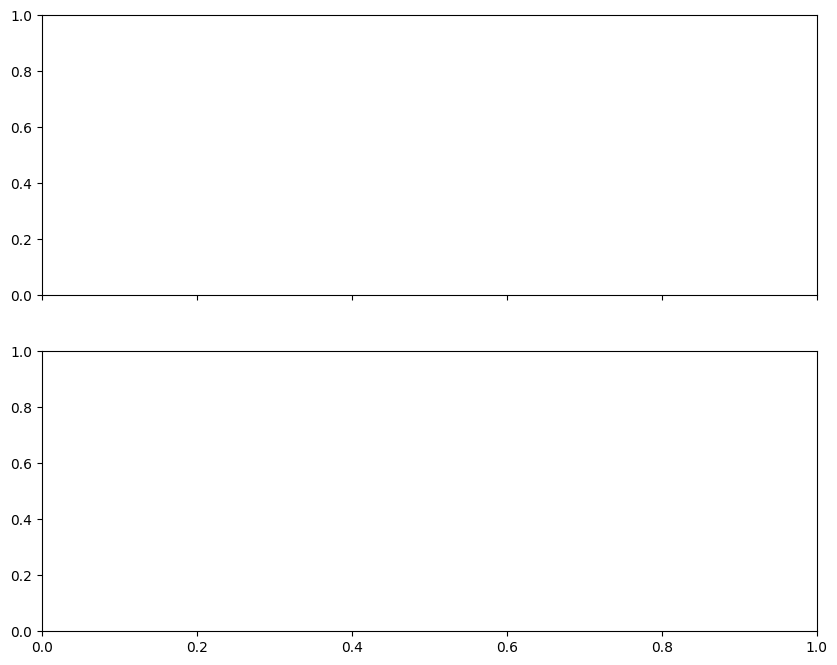

In [38]:


fig, (ax0, ax1) = plt.subplots(2,1, sharex=True)

monthly = df_.resample('M', on='Date').size().reset_index(name='count')
sns.lineplot(data=df_DIJA, x = "Date", y = "Volume", ax=ax0)
sns.lineplot(data=df_DIJA, x = "Date", y = "Adj Close", ax=ax1)
plt.show()


### Are the News Articles Unique?

In [43]:
# be able to view text
pd.set_option('display.max_colwidth', None)

# stories that happen more than once
df_cnt = df_reddit["News"].value_counts().to_frame().reset_index()
df_cnt.loc[df_cnt["count"] > 1,:]

,News,count
0,Iceland Declares Independence from International Banks,3
1,b'Why Russias response to Georgia was right',3
2,Corrupt Bank Officials Get Death Sentence in Vietnam,2
3,b'Dumped in Africa: Britains toxic waste',2
4,Seymour Hersh Alleges Obama Administration Lied on Syria Gas Attack,2
...,...,...
64,b'French professor sacked over 9/11 conspiracy theory',2
65,Russian soldiers training in Canada given 24 hours to leave country,2
66,"U.N. Report finds Israel ""summarily executed"" U.S. citizen on flotilla",2
67,Head of U.N. Panel Regrets Saying Israel Intentionally Killed Gazans,2


In [44]:
# are the dates different

news_head_str = "Iceland Declares Independence from International Banks"

df_top = df_reddit.loc[df_reddit.News == news_head_str]
df_top

,Date,News
45702,2011-06-29,Iceland Declares Independence from International Banks
47251,2011-04-28,Iceland Declares Independence from International Banks
47477,2011-04-19,Iceland Declares Independence from International Banks


In [49]:
# are the dates different

news_head_str = "Why Russias response to Georgia was right"

df_top = df_reddit.loc[df_reddit.News.str.contains(news_head_str), :]
df_top

,Date,News
71919,2008-08-14,b'Why Russias response to Georgia was right'
71947,2008-08-13,b'Why Russias response to Georgia was right'
71974,2008-08-12,b'Why Russias response to Georgia was right'


In [ ]:
_iceland_top = df_reddit.loc[df_reddit.News == "Iceland Declares Independence from International Banks"]
df_iceland_top